In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')


In [ ]:
# Check for missing values
print(df.isnull().sum())




Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


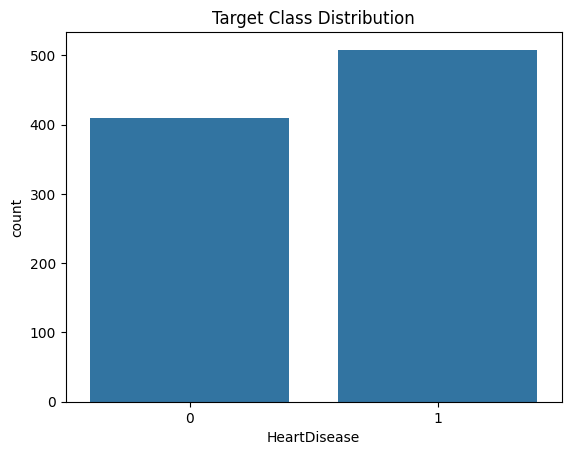

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats (only numeric columns will be described)
print(df.describe())

# Check class balance for HeartDisease
sns.countplot(x='HeartDisease', data=df)
plt.title('Target Class Distribution')
plt.show()




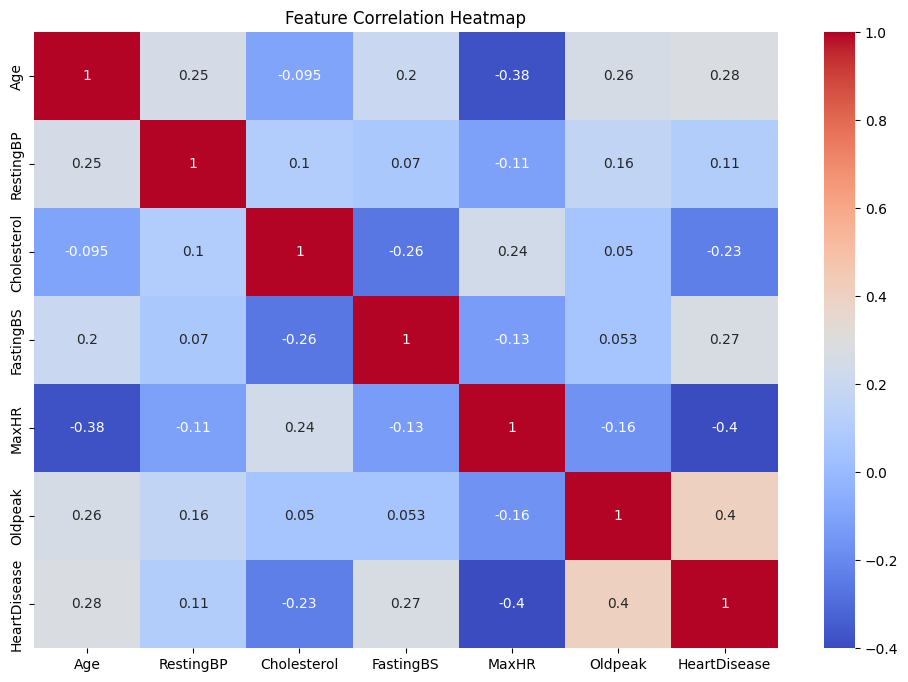

In [ ]:
# Correlation heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target using correct column name
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step 1: Scale the features (Train data and Test data separately)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train data fit & transform
X_test_scaled = scaler.transform(X_test)        # Test data transform only

# Step 2: Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best C parameter:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Step 3: Use best estimator to predict on test set
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Test set accuracy with best model:", accuracy_score(y_test, y_pred))


Best C parameter: {'C': 0.1}
Best cross-validation score: 0.8664802907464356
Test set accuracy with best model: 0.8532608695652174


Logistic Regression Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



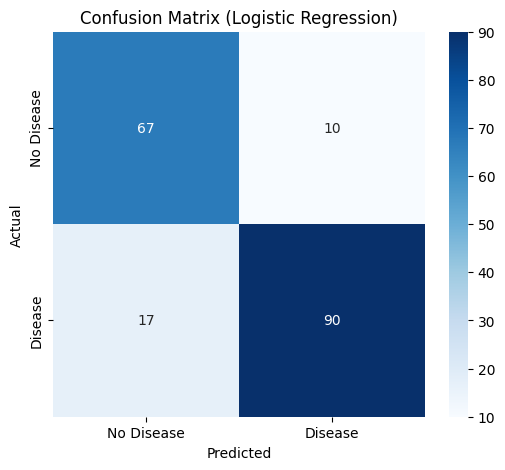

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Accuracy and Classification report (text)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()




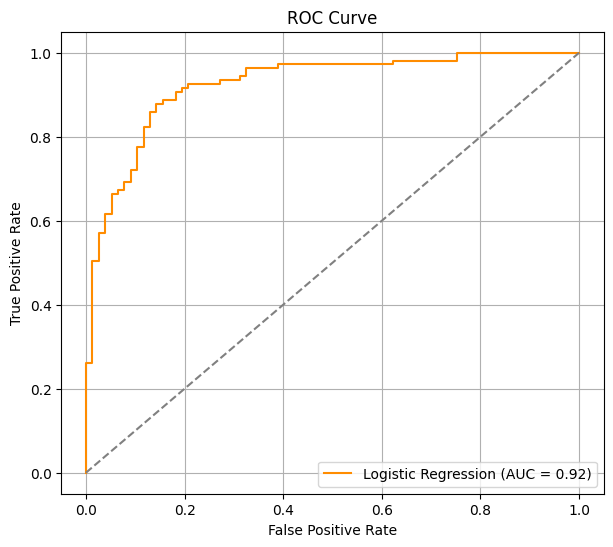

In [ ]:
# ROC Curve plot
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
auc_score = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

🔍 Top 10 Important Features:
              Feature  Coefficient  Importance (abs)
13      ST_Slope_Flat     0.656132          0.656132
8   ChestPainType_NAP    -0.625306          0.625306
7   ChestPainType_ATA    -0.573845          0.573845
14        ST_Slope_Up    -0.545914          0.545914
6               Sex_M     0.540404          0.540404
12   ExerciseAngina_Y     0.536653          0.536653
2         Cholesterol    -0.522455          0.522455
5             Oldpeak     0.488339          0.488339
3           FastingBS     0.427477          0.427477
9    ChestPainType_TA    -0.231396          0.231396


/tmp/ipython-input-8-2878462294.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance (abs)', y='Feature', palette='rocket')


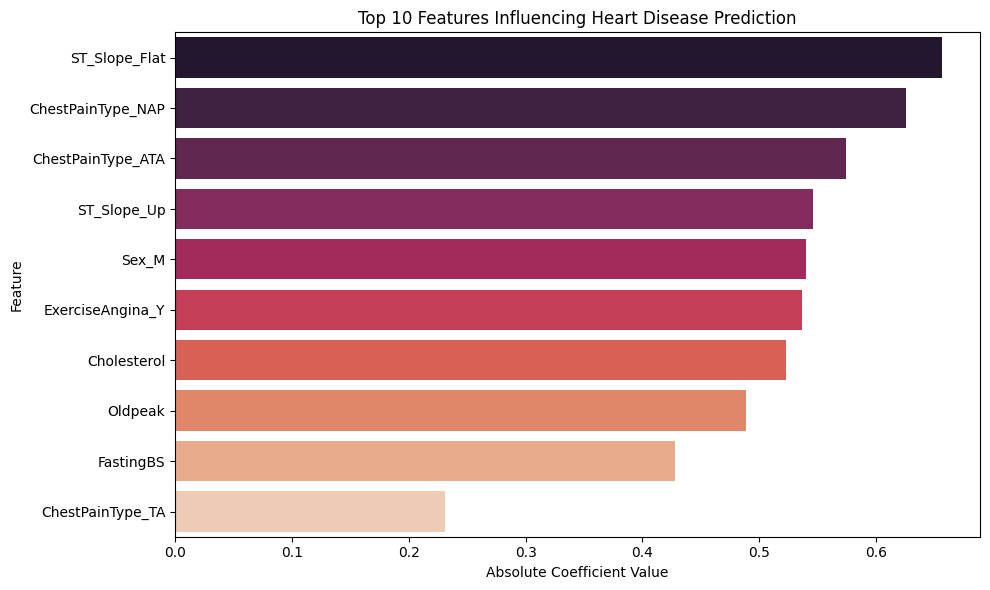

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Split X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Step 2: Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Automatically handles Sex, ChestPainType, etc.

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 6: Get feature importance
feature_names = X_encoded.columns
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (abs)': np.abs(coefficients)
}).sort_values(by='Importance (abs)', ascending=False)

# Step 7: Show top 10 features
print("🔍 Top 10 Important Features:")
print(feature_importance.head(10))

# Step 8: Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance (abs)', y='Feature', palette='rocket')
plt.title('Top 10 Features Influencing Heart Disease Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()
